# Cyclistic Bike-Share: Exploring User Behavior and Ride Patterns
This project focuses on analyzing the Cyclistic bike-share dataset to uncover insights into the riding behavior of two main user groups: members (subscribers) and casual users. Through detailed exploratory data analysis (EDA) using Python, this notebook provides a comprehensive understanding of how different user types engage with the service, what times and days see the most usage, and the impact of bike type and seasonality on user behavior.

The original dataset was made available by Motivate International Inc. under the following [license](https://divvybikes.com/data-license-agreement).

## About Dataset

The dataset is composed of first party data collected by Lyft Bike's and Scooters, LLC ("Bikeshare") and the City of Chicago's ("Divvy") bike sharing service.
The data has been processed to remove trips that are taken by staff as they service and inspect the system; and any trips that were below 60 seconds in length (potentially false starts or users trying to re-dock a bike to ensure it was secure).
The dataset consists of ride data for the month of September 2024.


**Dataset Name:** Divvy-tripdata

**Link to Dataset:** [Cyclistic Bike-Share](https://divvybikes-marketing-staging.lyft.net/system-data)


## Column Description

Here is a list of all the columns used in the analysis for the Cyclistic Bike-Share project:

**rideable_type:** Type of bike used for the trip (e.g., electric bike, docked bike).

**member_casual:** User type, indicating whether the user is a member or casual user.

**started_at:** The timestamp when the trip started (used to extract time-based insights such as hour, day of the week, and month).

**ended_at:** The timestamp when the trip ended (used to calculate trip duration).

**trip_duration:** The calculated duration of the trip in minutes (derived from started_at and ended_at).

**day_of_week:** The day of the week on which the trip was taken (derived from started_at).

**hour:** The hour of the day when the trip started (derived from started_at).

**month:** The month when the trip started (derived from started_at).

**weekend:** A boolean column indicating whether the trip was taken on a weekend (derived from day_of_week).



## Step 1: Importing Necessary Libraries

First, import the necessary Python libraries that we will use for data manipulation, visualization, and analysis.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Loading the Dataset
Load the dataset into the notebook.

In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/bike-sharing-sept-2024/202409-divvy-tripdata.csv')

# Preview the data
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,31D38723D5A8665A,electric_bike,2024-09-26 15:30:58.150,2024-09-26 15:30:59.437,NaN,NaN,NaN,NaN,41.91,-87.63,41.91,-87.63,member
1,67CB39987F4E895B,electric_bike,2024-09-26 15:31:32.529,2024-09-26 15:53:13.501,NaN,NaN,NaN,NaN,41.91,-87.63,41.91,-87.63,member
2,DA61204FD26EC681,electric_bike,2024-09-26 15:00:33.012,2024-09-26 15:02:25.406,NaN,NaN,NaN,NaN,41.90,-87.62,41.90,-87.63,member
3,06F160D46AF235DD,electric_bike,2024-09-26 18:19:06.491,2024-09-26 18:38:53.515,NaN,NaN,NaN,NaN,41.91,-87.63,41.90,-87.62,member
4,6FCA41D4317601EB,electric_bike,2024-09-03 19:49:57.054,2024-09-03 20:07:08.464,NaN,NaN,NaN,NaN,41.90,-87.69,41.90,-87.63,member


## Step 3: Data Cleaning and Preparation

We will now clean the data by handling missing values and converting columns to appropriate data types.

In [3]:
# Check for missing values
print(df.isnull().sum())

# Drop duplicates if there are any
df.drop_duplicates(inplace=True)

# Convert datetime fields to datetime objects
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Create new columns for additional analysis like trip duration
df['trip_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60.0  # in minutes

# Check data types
df.info()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    189150
start_station_id      189150
end_station_name      192950
end_station_id        192950
start_lat                  0
start_lng                  0
end_lat                  753
end_lng                  753
member_casual              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821276 entries, 0 to 821275
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             821276 non-null  object        
 1   rideable_type       821276 non-null  object        
 2   started_at          821276 non-null  datetime64[ns]
 3   ended_at            821276 non-null  datetime64[ns]
 4   start_station_name  632126 non-null  object        
 5   start_station_id    632126 non-null  object        
 6   end_station_name    628326 non-null  o

## Step 4: Exploratory Data Analysis (EDA)
We will now perform some exploratory data analysis to understand trends in the dataset.

a. Summary Statistics

In [4]:
# Summary statistics of numerical columns
df.describe()

# Check value counts for categorical variables (e.g., user type or rideable type)
df['rideable_type'].value_counts()
df['member_casual'].value_counts()

member_casual
member    474472
casual    346804
Name: count, dtype: int64

b. Visualizations
1. Distribution of Trip Duration

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


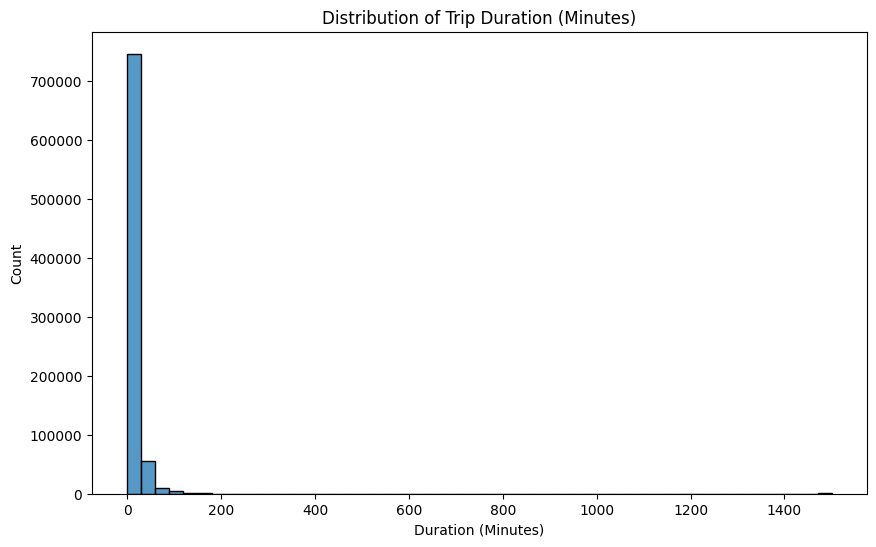

In [5]:
# Plot trip duration distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['trip_duration'], bins=50, kde=False)
plt.title('Distribution of Trip Duration (Minutes)')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Count')
plt.show()

2. Trips by User Type

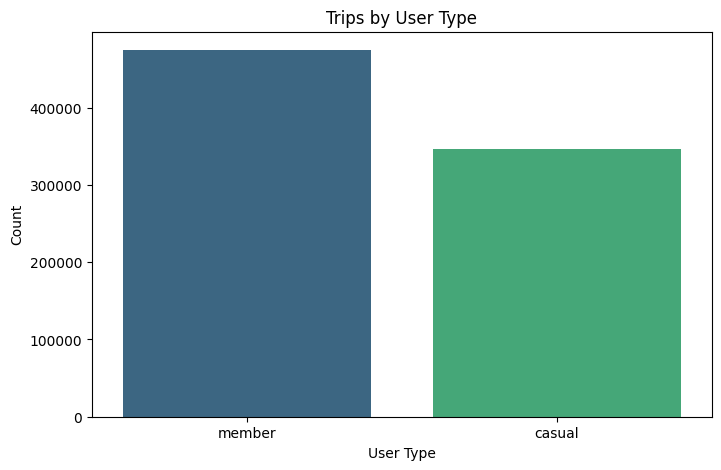

In [6]:
# Plot trips by user type (e.g., member vs casual users)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='member_casual', palette='viridis')
plt.title('Trips by User Type')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.show()

3. Number of Trips over Time

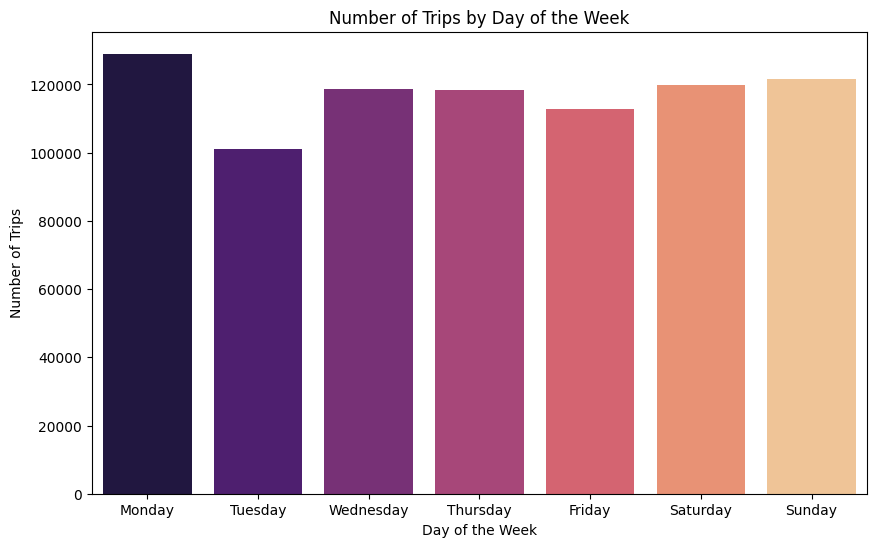

In [7]:
# Extract day of the week and hour for analysis
df['day_of_week'] = df['started_at'].dt.day_name()
df['hour'] = df['started_at'].dt.hour

# Plot number of trips per day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', palette='magma', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Trips by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.show()

4. Trips by Hour of the Day

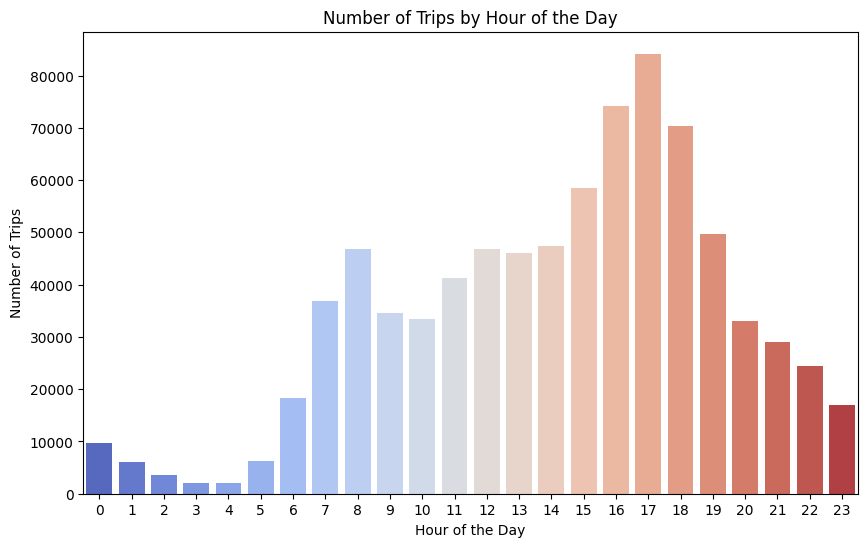

In [8]:
# Plot number of trips per hour
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='hour', palette='coolwarm')
plt.title('Number of Trips by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

5. Trips by Rideable Type

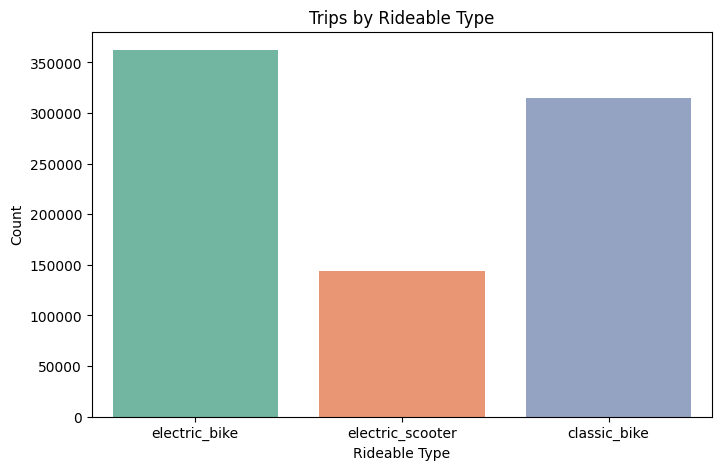

In [9]:
# Plot trips by rideable type
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='rideable_type', palette='Set2')
plt.title('Trips by Rideable Type')
plt.xlabel('Rideable Type')
plt.ylabel('Count')
plt.show()

6. Average Trip Duration by User Type

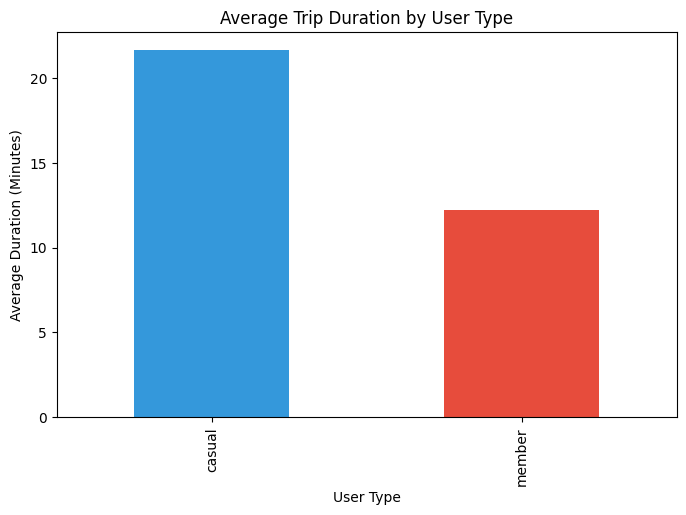

In [10]:
# Group by user type and calculate average trip duration
avg_trip_duration = df.groupby('member_casual')['trip_duration'].mean()

# Plot average trip duration
avg_trip_duration.plot(kind='bar', color=['#3498db', '#e74c3c'], figsize=(8, 5))
plt.title('Average Trip Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Average Duration (Minutes)')
plt.show()

7. Trip Duration by Day of the Week

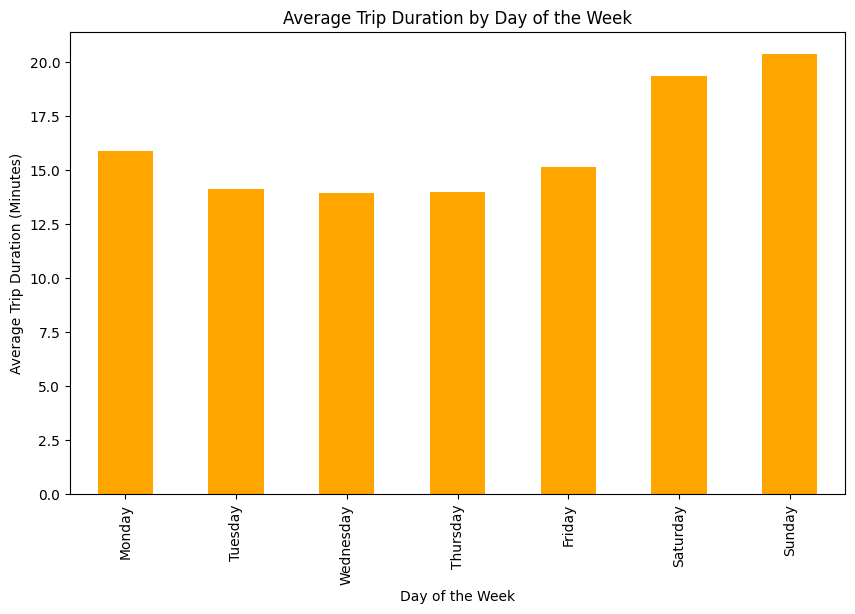

In [11]:
# Group by day of the week and calculate mean trip duration
mean_duration_per_day = df.groupby('day_of_week')['trip_duration'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot mean trip duration per day of the week
mean_duration_per_day.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Average Trip Duration by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Trip Duration (Minutes)')
plt.show()

8. Peak Hour Analysis for Casual vs. Member Riders

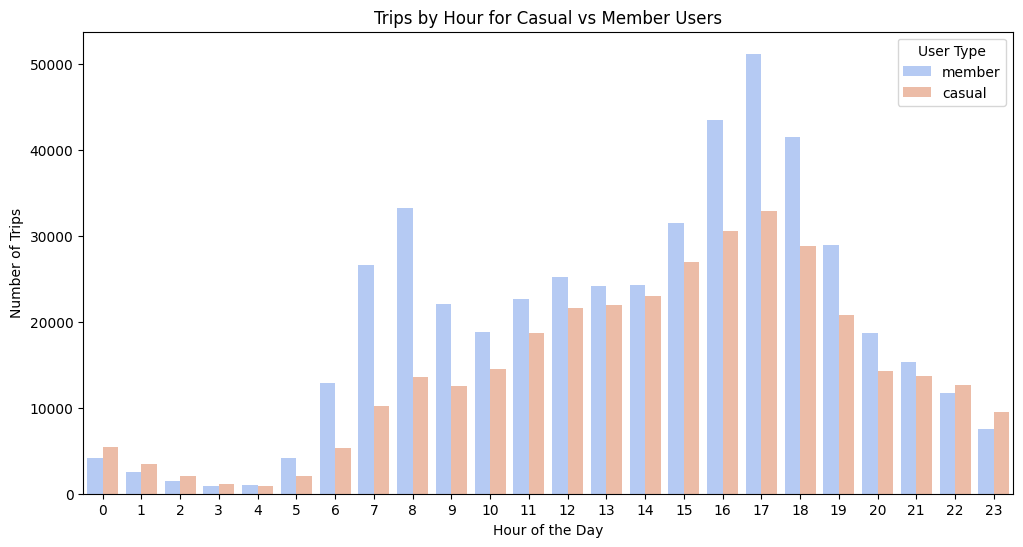

In [12]:
# Plot trips by hour for casual vs. member
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='hour', hue='member_casual', palette='coolwarm')
plt.title('Trips by Hour for Casual vs Member Users')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.legend(title='User Type')
plt.show()

9. User Distribution Over Weekends and Weekdays

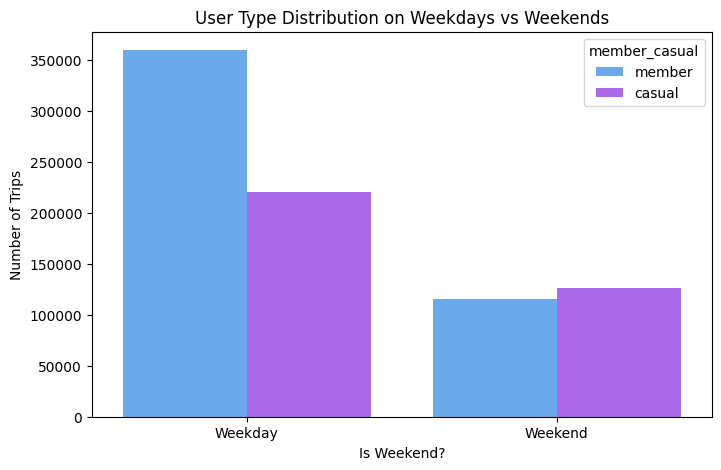

In [13]:
# Create a new column to label whether the trip occurred on a weekend or a weekday
df['weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])

# Plot the distribution of user types across weekdays and weekends
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='weekend', hue='member_casual', palette='cool')
plt.title('User Type Distribution on Weekdays vs Weekends')
plt.xlabel('Is Weekend?')
plt.ylabel('Number of Trips')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()

10. Trip Duration Distribution by Rideable Type

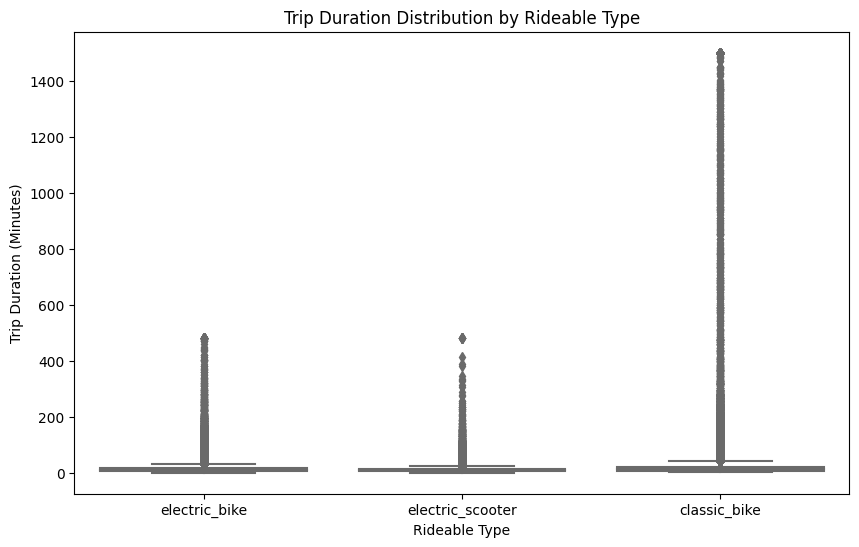

In [14]:
# Plot trip duration distribution for each rideable type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='rideable_type', y='trip_duration', palette='Set3')
plt.title('Trip Duration Distribution by Rideable Type')
plt.xlabel('Rideable Type')
plt.ylabel('Trip Duration (Minutes)')
plt.show()

12. Trip Duration Distribution by User Type

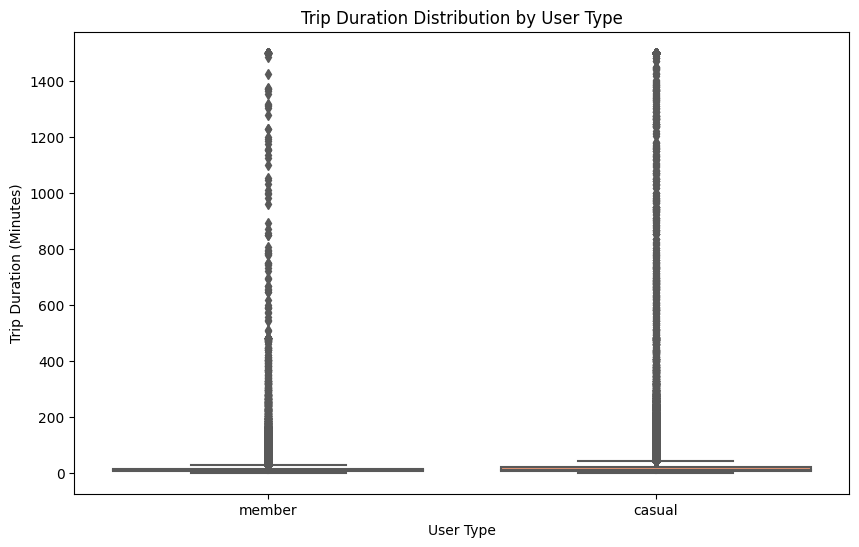

In [15]:
# Plot trip duration distribution for each user type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='member_casual', y='trip_duration', palette='Set2')
plt.title('Trip Duration Distribution by User Type')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (Minutes)')
plt.show()

13. Hourly Distribution of Trips on Weekdays vs. Weekends

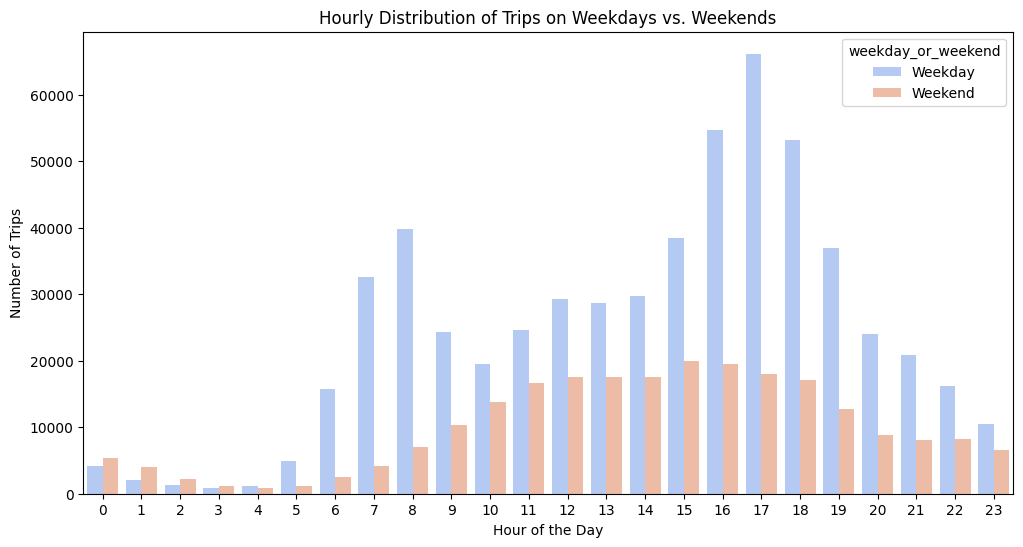

In [16]:
# Create a new column to classify each trip as weekday or weekend
df['weekday_or_weekend'] = np.where(df['day_of_week'].isin(['Saturday', 'Sunday']), 'Weekend', 'Weekday')

# Plot hourly distribution for weekdays vs. weekends
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='hour', hue='weekday_or_weekend', palette='coolwarm')
plt.title('Hourly Distribution of Trips on Weekdays vs. Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

14. User Type vs. Rideable Type

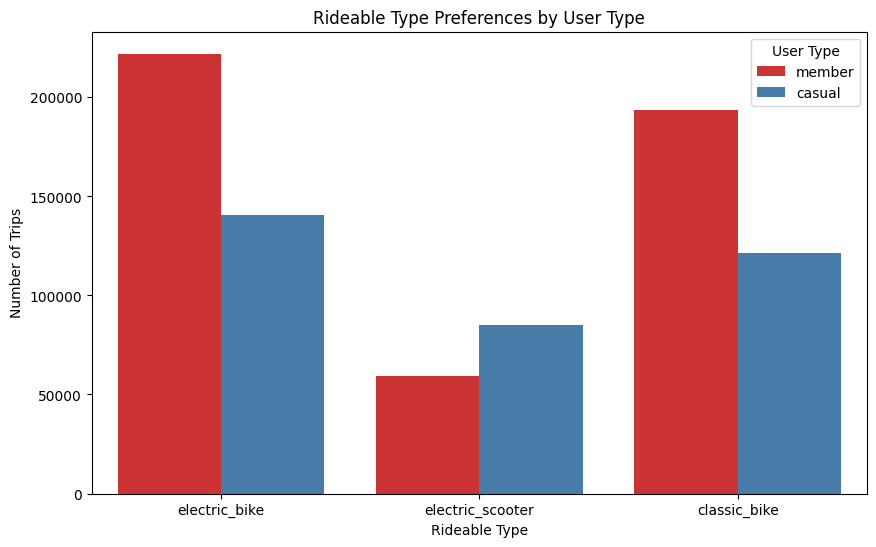

In [17]:
# Plot bike type preference by user type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rideable_type', hue='member_casual', palette='Set1')
plt.title('Rideable Type Preferences by User Type')
plt.xlabel('Rideable Type')
plt.ylabel('Number of Trips')
plt.legend(title='User Type')
plt.show()

15. Member vs. Casual Usage by Day of the Week

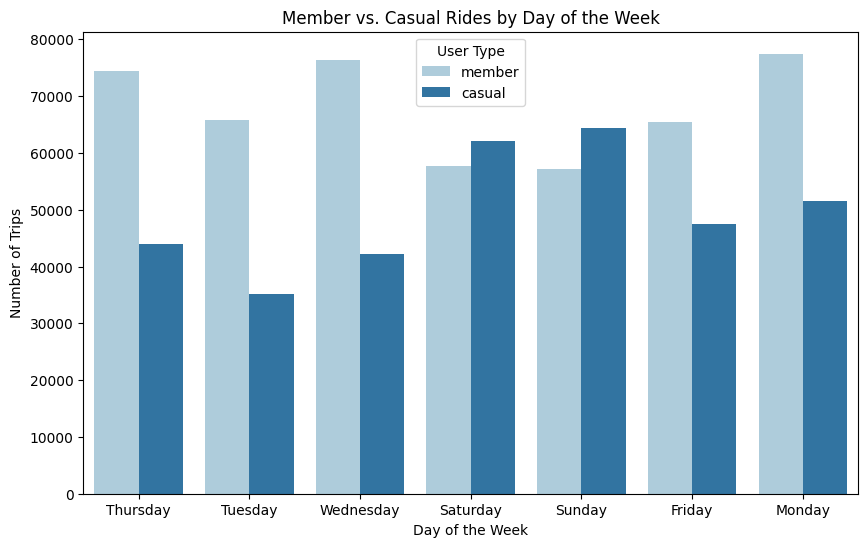

In [18]:
# Plot user type distribution across days of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', hue='member_casual', palette='Paired')
plt.title('Member vs. Casual Rides by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.legend(title='User Type')
plt.show()